# Importing Libraries

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns

# Importing Dataset

In [7]:
dataset= pd.read_csv('titanic.csv')

In [8]:
dataset.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Checking missing values

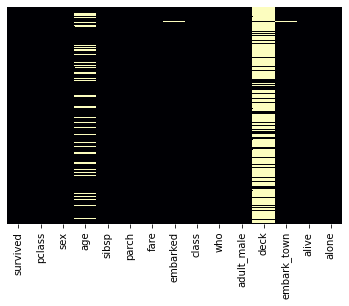

In [17]:
sns.heatmap(dataset.isnull(), cbar=False, yticklabels=False, cmap='magma')

In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


# Separating categorical and numerical datas


In [21]:
categorical= [col for col in dataset.columns if dataset[col].dtype == 'O']

In [22]:
categorical

['sex', 'embarked', 'class', 'who', 'deck', 'embark_town', 'alive']

In [24]:
numerical= [col for col in dataset.columns if dataset[col].dtype !='O']

In [25]:
numerical

['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'adult_male', 'alone']

# Counting and handling missing values

In [28]:
for col in categorical:
    if (dataset[col].isnull().sum()>0):
        print('The column {} has missing value: {}'.format(col, dataset[col].isnull().sum()))

The column embarked has missing value: 2
The column deck has missing value: 688
The column embark_town has missing value: 2


In [30]:
for col in numerical:
    if (dataset[col].isnull().sum()>0):
        print('The column {} has missing value: {}'. format(col, dataset[col].isnull().sum()))

The column age has missing value: 177


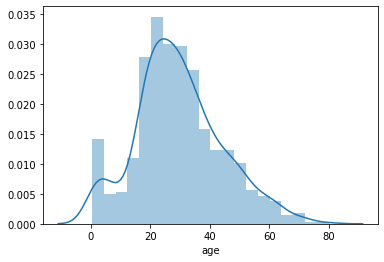

In [34]:
sns.distplot(dataset['age'])

In [35]:
from sklearn.impute import SimpleImputer

In [36]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [37]:
dataset.columns.get_loc('age')

3

In [38]:
dataset.iloc[:,3:4] = imputer.fit_transform(dataset.iloc[:,3:4])

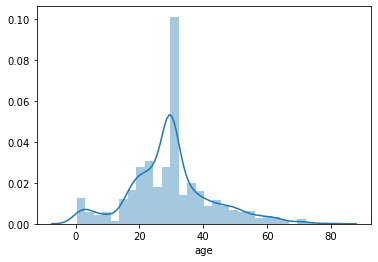

In [39]:
sns.distplot(dataset['age'])

In [40]:
dataset.drop(columns=['deck'], axis=1, inplace=True)

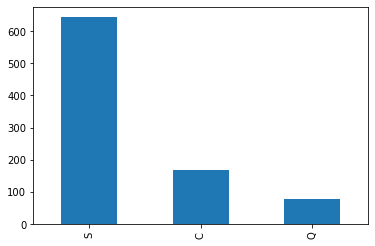

In [41]:
dataset['embarked'].value_counts().plot.bar()

In [42]:
dataset['embarked'].fillna(value='S', inplace=True)

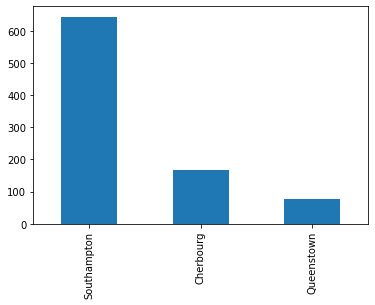

In [43]:
dataset['embark_town'].value_counts().plot.bar()

In [45]:
dataset['embark_town'].fillna(value='Southampton', inplace=True)

In [46]:
dataset.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

# Categorical Encoding